In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("cyl_raw.csv",delimiter=";")
df.head()

,Drehzahl,Kurbelwinkel,P_ZYL1,P_ZYL2,P_ZYL3,Drehmoment,Absolutverbrauch,Angesaugte Luftmasse,O2 roh,CO roh,...,Lambda,Temp Kühlm.E,Temp Kühlm.A,Temp Oel,Temp Ansaugl. nach Verd.,Temp Ansaugluft Saugrohr,Temp Abgas vor Turbine,P Saugrohr,P Abg. vor Turb.,ZZP
0,1600,-360,1.043,1.040,1.014,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
1,1600,-359,1.048,1.037,1.011,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
2,1600,-358,1.053,1.045,1.024,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
3,1600,-357,1.061,1.054,1.028,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
4,1600,-356,1.067,1.055,1.033,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8


In [3]:
# cycle identifizieren
# 180°: Ansaugen, 180°: Verdichten,...
d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
cycle = [0]*180 + [1]*180 + [2]*180 + [3]*180
cycles = cycle*len(df["Drehzahl"].unique())
df["Cycle"]  = cycles

In [4]:
# volumen in abh. des winkels berechnen
def volume(winkel, h=76,l=135,dea=-0.6,s=0,eps=10,b=73):
    """
    params:
        winkel: Kurbelwinkel [°]
        h: Kolbenhub [mm]
        l: Pleuellänge [mm]
        dea: Deachsierung [mm]
        s: Schränkung [mm]
        eps: Verdichtungsverhältnis [1]
        b: Bohrung [mm]
    returns: 
        Volumen in Abh. von winkel [mm**3]
    """
    v_hub = (b/2)**2 * m.pi * h #mm**3
    x = h/2 * (1 - m.cos(m.radians(winkel))) + l * (1 - m.sqrt(1 - ((h*m.sin(m.radians(winkel)))/(2*l) - (dea-s)/l)**2))
    v = v_hub/(eps-1) + b**2 *(m.pi/4) * x
    return v

df["Volumen"] = df["Kurbelwinkel"].map(volume)
df.head()

,Drehzahl,Kurbelwinkel,P_ZYL1,P_ZYL2,P_ZYL3,Drehmoment,Absolutverbrauch,Angesaugte Luftmasse,O2 roh,CO roh,...,Temp Kühlm.A,Temp Oel,Temp Ansaugl. nach Verd.,Temp Ansaugluft Saugrohr,Temp Abgas vor Turbine,P Saugrohr,P Abg. vor Turb.,ZZP,Cycle,Volumen
0,1600,-360,1.043,1.040,1.014,89.6,3.82,54.6789,0.807,0.71,...,88,76.75,53,30.73,674.18,1077,1194.77,8,0,35348.846962
1,1600,-359,1.048,1.037,1.011,89.6,3.82,54.6789,0.807,0.71,...,88,76.75,53,30.73,674.18,1077,1194.77,8,0,35392.225140
2,1600,-358,1.053,1.045,1.024,89.6,3.82,54.6789,0.807,0.71,...,88,76.75,53,30.73,674.18,1077,1194.77,8,0,35497.668073
3,1600,-357,1.061,1.054,1.028,89.6,3.82,54.6789,0.807,0.71,...,88,76.75,53,30.73,674.18,1077,1194.77,8,0,35665.127327
4,1600,-356,1.067,1.055,1.033,89.6,3.82,54.6789,0.807,0.71,...,88,76.75,53,30.73,674.18,1077,1194.77,8,0,35894.524121


In [5]:
# Druck Mittelwert
df["P_ZYLm"] = df.loc[:,["P_ZYL1","P_ZYL2","P_ZYL3"]].mean(axis=1)
df.head()

,Drehzahl,Kurbelwinkel,P_ZYL1,P_ZYL2,P_ZYL3,Drehmoment,Absolutverbrauch,Angesaugte Luftmasse,O2 roh,CO roh,...,Temp Oel,Temp Ansaugl. nach Verd.,Temp Ansaugluft Saugrohr,Temp Abgas vor Turbine,P Saugrohr,P Abg. vor Turb.,ZZP,Cycle,Volumen,P_ZYLm
0,1600,-360,1.043,1.040,1.014,89.6,3.82,54.6789,0.807,0.71,...,76.75,53,30.73,674.18,1077,1194.77,8,0,35348.846962,1.032333
1,1600,-359,1.048,1.037,1.011,89.6,3.82,54.6789,0.807,0.71,...,76.75,53,30.73,674.18,1077,1194.77,8,0,35392.225140,1.032000
2,1600,-358,1.053,1.045,1.024,89.6,3.82,54.6789,0.807,0.71,...,76.75,53,30.73,674.18,1077,1194.77,8,0,35497.668073,1.040667
3,1600,-357,1.061,1.054,1.028,89.6,3.82,54.6789,0.807,0.71,...,76.75,53,30.73,674.18,1077,1194.77,8,0,35665.127327,1.047667
4,1600,-356,1.067,1.055,1.033,89.6,3.82,54.6789,0.807,0.71,...,76.75,53,30.73,674.18,1077,1194.77,8,0,35894.524121,1.051667


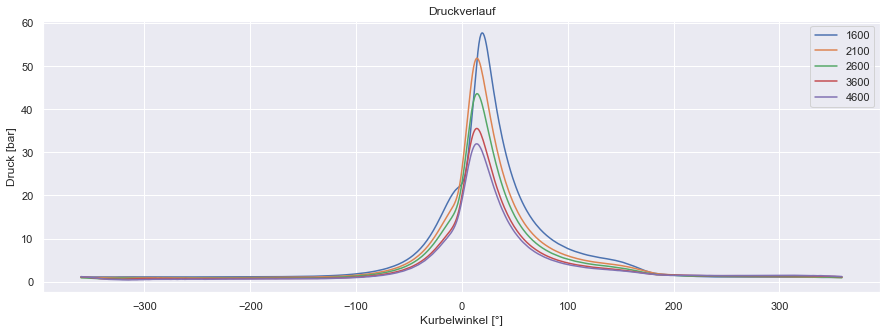

In [6]:
#Druckverlauf alle Drehzahlen plotten
fig, ax = plt.subplots(1,1,figsize=(15,5))
for rpm in df["Drehzahl"].unique():
    df_rpm = df[df["Drehzahl"]==rpm]
    ax.plot(df_rpm["Kurbelwinkel"],df_rpm["P_ZYLm"],label=rpm)
ax.set_title("Druckverlauf")
ax.set_xlabel("Kurbelwinkel [°]")
ax.set_ylabel("Druck [bar]")
plt.legend()
plt.show()

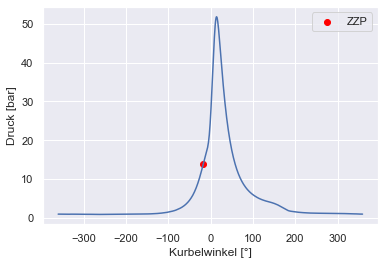

In [41]:
#Druck verlauf über Winkel mit ZZP
def ZZP(rpm,log=False,ax=None,over="volume"):
    '''
    params:
        rpm: Drehzahl in [1600,2100,2600,3600,4600]
        log: bool, True: y-Achse log skala
        ax: default: None, erstellt fig,ax. Sonst existiedendes plt.axes, um darauf zu plotten
        over: x-achse über der zu plotten ist in ["volume","angle"]
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ZZP = df_rpm["ZZP"].unique()[0]
    
    
    if not ax:
        fig,ax = plt.subplots()
        
    if over == "volume":
        x = volume(-ZZP)
    elif over == "angle":
        x = -ZZP
    ax.scatter(x,df_rpm[(df_rpm["Cycle"]==1) & (df_rpm["Kurbelwinkel"]==-ZZP)]["P_ZYLm"],color="red",label="ZZP")

def p_angle(rpm,ax=None):
    '''
    params:
        rpm: Drehzahl
        ax: existierendes plt.axes object. falls None wird eines erstellt
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots()
    
    ax.plot(df_rpm["Kurbelwinkel"],df_rpm["P_ZYLm"])
    ax.set_xlabel("Kurbelwinkel [°]")
    ax.set_ylabel("Druck [bar]")

fig, ax = plt.subplots()
p_angle(2100,ax=ax)
ZZP(2100,ax=ax,over="angle")
plt.legend()

plt.show()

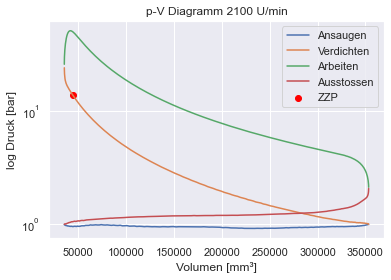

In [38]:
#p-V Diagramm mit Zyklen (Ansaugen, Kompression, ...)
def pV(rpm,log=False,ax=None):
    '''
    Plotted ein p-V-Digramm für die angegebene Drehzahl {rpm}
    params:
        rpm:
        log:
        ax:
    '''
    d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
    for cyc in df_rpm["Cycle"].unique():
        df_rpm_cyc = df_rpm[df_rpm["Cycle"]==cyc]
        ax.plot(df_rpm_cyc["Volumen"],df_rpm_cyc["P_ZYLm"],label=d[cyc])

    ax.set_xlabel("Volumen [mm³]")
    ax.set_ylabel("Druck [bar]")
    if log:
        ax.set_yscale("log")
        ax.set_ylabel("log Druck [bar]")
    
    plt.title(f"p-V Diagramm {rpm} U/min")
    
    
fig,ax = plt.subplots()
pV(2100,log=True,ax=ax)
ZZP(2100,log=True,ax=ax)

plt.legend()
plt.show()

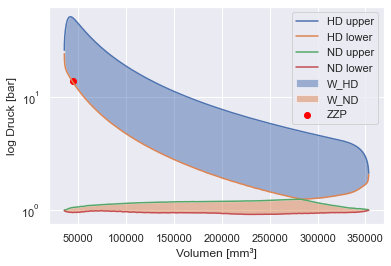

In [29]:
# Arbeit HD, ND Schleife
# HD -> cycle 2 - max(cycle1,cycle3)
# ND -> min(cycle3,cycle1) - cycle0
def HD(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Hochdruckschleife als Kombination der Drucklinien der einzelnen Zyklen folgenderweise:
    HD nach oben durch Arbeits-Druckverlauf (Cycle=2) begrenzt und nach unten durch das Maximum von Ausstoß- (Cycle=3) 
    und Verdichtungs-verlauf (Cycle=1).
    ND nach unten durch Ansaug-verlauf (Cycle=0) begrenzt und nach oben durch das Minimum von Ausstoß (3) und
    Verdichtungs-verlauf (1).
    
    params:
        rpm:
        log:
        ax:
        plot: default True. False falls nur die HD Arbeit zurückgegeben werden soll.
    returns:
        HD Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    HD = df_rpm[df_rpm["Cycle"]==2].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD.rename(columns={"P_ZYLm":"upper"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD_lower = [max(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    HD["lower"] = HD_lower
    
    if plot:
        if not ax:
            fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
        ax.plot(HD["Volumen"],HD["upper"],label="HD upper")
        ax.plot(HD["Volumen"],HD["lower"],label="HD lower")
        
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(HD["Volumen"],HD["lower"],HD["upper"],label="W_HD",alpha=0.5)
    
    #return arbeit

def ND(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Niederdruckschleife. Doc analog HD
    
    params:
        rpm:
        log:
        ax:
        plot:
    returns:
        ND Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ND = df_rpm[df_rpm["Cycle"]==0].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND.rename(columns={"P_ZYLm":"lower"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND_upper = [min(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    ND["upper"] = ND_upper
    
    if plot:
        if not ax:
            fig,ax = plt.subplots()
            
        ax.plot(ND["Volumen"],ND["upper"],label="ND upper")
        ax.plot(ND["Volumen"],ND["lower"],label="ND lower")
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(ND["Volumen"],ND["lower"],ND["upper"],label="W_ND",alpha=0.5)
    
    #return arbeit
    
fig,ax = plt.subplots()

HD(2100,log=True,ax=ax)
ND(2100,log=True,ax=ax)
ZZP(2100,log=True,ax=ax)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Volumen'>

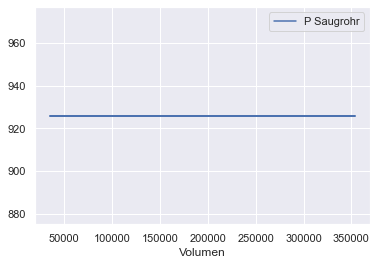

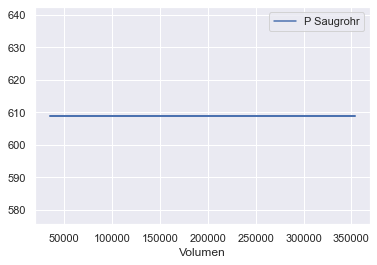

In [106]:
df[df["Drehzahl"]==2100].plot("Volumen","P Saugrohr")
df[df["Drehzahl"]==4600].plot("Volumen","P Saugrohr")

(array([ 1,  1,  0, -1,  0,  0, -1,  0]),
 array([ 0,  0,  1,  0, -1, -1,  0,  1]),
 array([ 1,  1,  0, -2,  0,  0,  0,  0]))

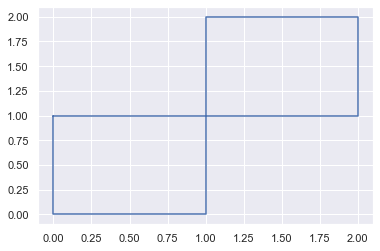

In [46]:
def sign(a):
    return np.array(list(map(lambda x: 1.0 if x >= 0 else -1.0 ,a)))

def lineintegrate(y,x):
    dx = np.diff(x)
    dy = np.diff(y)
    vz = sign(dx*dy)
    s = vz*np.sqrt(dx**2 + dy**2)
    
    if (x[0],y[0]) == (x[-1],y[-1]):
        return s*y[:-1]

x = np.array([0,1,2,2,1,1,1,0,0])
y = np.array([1,1,1,2,2,1,0,0,1])

A = np.trapz(y,x=x)

plt.plot(x,y)

dx = np.diff(x)
dy = np.diff(y)
s = np.sqrt(dx**2 + dy**2)
v = np.diff(x)*y[:-1]
dx,dy,v